In [1]:
# importing python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from plotnine import * 
from plotnine.data import mtcars
from scipy.stats import pearsonr
import glob

%matplotlib inline
sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.5 umap==0.5.1 numpy==1.21.0 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.2 pynndescent==0.5.2


In [2]:
adata_list = [f for f in glob.glob("Individual_Tumor/*.h5ad")]
adata_list

['Individual_Tumor/MULTI_J55454.h5ad',
 'Individual_Tumor/SS2_H5097.h5ad',
 'Individual_Tumor/SS2_HCI001.h5ad',
 'Individual_Tumor/MULTI_HCI002.h5ad',
 'Individual_Tumor/MULTI_J2036.h5ad',
 'Individual_Tumor/SS2_J53353.h5ad',
 'Individual_Tumor/SS2_HCI011.h5ad',
 'Individual_Tumor/SS2_H4272.h5ad',
 'Individual_Tumor/SS2_HCI009.h5ad',
 'Individual_Tumor/SS2_J2036.h5ad',
 'Individual_Tumor/SS2_H3204.h5ad',
 'Individual_Tumor/MULTI_HCI011.h5ad',
 'Individual_Tumor/MULTI_J53353.h5ad',
 'Individual_Tumor/SS2_HCI010.h5ad',
 'Individual_Tumor/MULTI_H5097.h5ad',
 'Individual_Tumor/SS2_J55454.h5ad',
 'Individual_Tumor/SS2_H5471.h5ad',
 'Individual_Tumor/SS2_HCI005.h5ad',
 'Individual_Tumor/MULTI_HCI005.h5ad',
 'Individual_Tumor/MULTI_HCI001.h5ad',
 'Individual_Tumor/MULTI_H4272.h5ad',
 'Individual_Tumor/MULTI_HCI010.h5ad']

In [3]:
pc_df_r = pd.DataFrame(index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df_p = pd.DataFrame(index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [4]:
for i in adata_list:
    temp_adata = sc.read_h5ad(i)
    temp_df = pd.DataFrame(temp_adata.obsm['X_pca'], index=temp_adata.obs_names)
    tumor_sample = i.split('.')[0].split('Individual_Tumor/')[1]
    tumor_id = tumor_sample.split('_')[1]
    temp_adata = temp_adata[temp_adata.obs['Tumor_ID'] == tumor_id].copy()
    temp_combined = pd.concat([temp_df, temp_adata.obs], ignore_index=False, axis=1)
    for j in range(0,5):
        r,p = pearsonr(temp_combined[j],temp_combined["EMP_score"])
        pc_df_r.loc[('PC'+str(j+1)),tumor_sample] = r
        pc_df_p.loc[('PC'+str(j+1)),tumor_sample] = p
        

In [5]:
df_r_reshape = pc_df_r.unstack()
df_r_reshape = df_r_reshape.to_frame()
df_r_reshape = df_r_reshape.rename(columns={0: "correlation"})
df_r_reshape

correlation
MULTI_J55454 PC1    -0.458202
             PC2     0.320651
             PC3    -0.103779
             PC4     0.022612
             PC5    -0.285214
...                       ...
MULTI_HCI010 PC1     0.167772
             PC2    -0.307154
             PC3     0.228197
             PC4     0.194402
             PC5    -0.294035

[110 rows x 1 columns]

In [6]:
df_p_reshape = pc_df_p.unstack()
df_p_reshape = df_p_reshape.to_frame()
df_p_reshape = df_p_reshape.rename(columns={0: "p_value"})
df_p_reshape

p_value
MULTI_J55454 PC1  1.597454e-09
             PC2  4.234822e-05
             PC3  1.958566e-01
             PC4  7.786351e-01
             PC5  2.938453e-04
...                        ...
MULTI_HCI010 PC1  7.084712e-13
             PC2  8.780300e-41
             PC3  8.911642e-23
             PC4  7.571095e-17
             PC5  2.295635e-37

[110 rows x 1 columns]

In [7]:
final_df = df_r_reshape.copy()
for i in final_df.index:
    final_df.loc[i, 'p_value'] = df_p_reshape.loc[i, 'p_value']

In [8]:
final_df

correlation       p_value
MULTI_J55454 PC1    -0.458202  1.597454e-09
             PC2     0.320651  4.234822e-05
             PC3    -0.103779  1.958566e-01
             PC4     0.022612  7.786351e-01
             PC5    -0.285214  2.938453e-04
...                       ...           ...
MULTI_HCI010 PC1     0.167772  7.084712e-13
             PC2    -0.307154  8.780300e-41
             PC3     0.228197  8.911642e-23
             PC4     0.194402  7.571095e-17
             PC5    -0.294035  2.295635e-37

[110 rows x 2 columns]

In [9]:
final_df = final_df.reset_index()
final_df

,level_0,level_1,correlation,p_value
0,MULTI_J55454,PC1,-0.458202,1.597454e-09
1,MULTI_J55454,PC2,0.320651,4.234822e-05
2,MULTI_J55454,PC3,-0.103779,1.958566e-01
3,MULTI_J55454,PC4,0.022612,7.786351e-01
4,MULTI_J55454,PC5,-0.285214,2.938453e-04
...,...,...,...,...
105,MULTI_HCI010,PC1,0.167772,7.084712e-13
106,MULTI_HCI010,PC2,-0.307154,8.780300e-41
107,MULTI_HCI010,PC3,0.228197,8.911642e-23
108,MULTI_HCI010,PC4,0.194402,7.571095e-17


In [10]:
final_df = final_df.rename(columns={"level_0": "Tumor_sample", "level_1": "PCA"})
final_df

,Tumor_sample,PCA,correlation,p_value
0,MULTI_J55454,PC1,-0.458202,1.597454e-09
1,MULTI_J55454,PC2,0.320651,4.234822e-05
2,MULTI_J55454,PC3,-0.103779,1.958566e-01
3,MULTI_J55454,PC4,0.022612,7.786351e-01
4,MULTI_J55454,PC5,-0.285214,2.938453e-04
...,...,...,...,...
105,MULTI_HCI010,PC1,0.167772,7.084712e-13
106,MULTI_HCI010,PC2,-0.307154,8.780300e-41
107,MULTI_HCI010,PC3,0.228197,8.911642e-23
108,MULTI_HCI010,PC4,0.194402,7.571095e-17


In [11]:
final_df['method'] = [x.split('_')[0] for x in final_df['Tumor_sample'].tolist()]
final_df['Tumor_ID'] = [x.split('_')[1] for x in final_df['Tumor_sample'].tolist()]

In [12]:
final_df

,Tumor_sample,PCA,correlation,p_value,method,Tumor_ID
0,MULTI_J55454,PC1,-0.458202,1.597454e-09,MULTI,J55454
1,MULTI_J55454,PC2,0.320651,4.234822e-05,MULTI,J55454
2,MULTI_J55454,PC3,-0.103779,1.958566e-01,MULTI,J55454
3,MULTI_J55454,PC4,0.022612,7.786351e-01,MULTI,J55454
4,MULTI_J55454,PC5,-0.285214,2.938453e-04,MULTI,J55454
...,...,...,...,...,...,...
105,MULTI_HCI010,PC1,0.167772,7.084712e-13,MULTI,HCI010
106,MULTI_HCI010,PC2,-0.307154,8.780300e-41,MULTI,HCI010
107,MULTI_HCI010,PC3,0.228197,8.911642e-23,MULTI,HCI010
108,MULTI_HCI010,PC4,0.194402,7.571095e-17,MULTI,HCI010


In [13]:
final_df.loc[final_df['p_value'] >= 0.05, 'significant'] = 1
final_df.loc[final_df['p_value'] < 0.05, 'significant'] = 0

In [14]:
final_df

,Tumor_sample,PCA,correlation,p_value,method,Tumor_ID,significant
0,MULTI_J55454,PC1,-0.458202,1.597454e-09,MULTI,J55454,0.0
1,MULTI_J55454,PC2,0.320651,4.234822e-05,MULTI,J55454,0.0
2,MULTI_J55454,PC3,-0.103779,1.958566e-01,MULTI,J55454,1.0
3,MULTI_J55454,PC4,0.022612,7.786351e-01,MULTI,J55454,1.0
4,MULTI_J55454,PC5,-0.285214,2.938453e-04,MULTI,J55454,0.0
...,...,...,...,...,...,...,...
105,MULTI_HCI010,PC1,0.167772,7.084712e-13,MULTI,HCI010,0.0
106,MULTI_HCI010,PC2,-0.307154,8.780300e-41,MULTI,HCI010,0.0
107,MULTI_HCI010,PC3,0.228197,8.911642e-23,MULTI,HCI010,0.0
108,MULTI_HCI010,PC4,0.194402,7.571095e-17,MULTI,HCI010,0.0


In [15]:
final_df_filtered = final_df[final_df['method'] == 'SS2']

cat_order = ['J55454', 'H5471', 'HCI005', 'H3204', 'H4272', 'HCI009',
    'HCI011', 'HCI001', 'H5097', 'J2036', 'J53353', 'HCI010']
final_df_filtered['Tumor_ID'] = pd.Categorical(final_df_filtered['Tumor_ID'], categories=cat_order, ordered=True)

pca_order = ['PC5', 'PC4', 'PC3', 'PC2', 'PC1']
final_df_filtered['PCA'] = pd.Categorical(final_df_filtered['PCA'], categories= pca_order, ordered=True)

receptor_plot_ref = (ggplot(final_df_filtered,aes(y='PCA', x='Tumor_ID',size='significant', fill='correlation')) 
                     + geom_point(alpha=1, color='gray') 
                     + scale_size(name="p value",range = [2,10], trans='reverse', breaks=[0,1], labels=['< 0.05','> 0.05']) 
                     + scale_fill_cmap(('PiYG'), limits=(-0.8,0.8)) 
                     + theme(axis_text_x=element_text(rotation=90),
                             axis_text_y=element_text(size=10, hjust=1),
                             plot_background=element_rect(fill='white', alpha=.3),
                             panel_background=element_rect(fill='white', alpha=.2),figure_size=(5, 2),
                             panel_border = element_rect(colour = "black", fill=None, size=1),
                             legend_key = element_blank())
                    )



<ipython-input-15-2b84cc3e2860>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-2b84cc3e2860>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


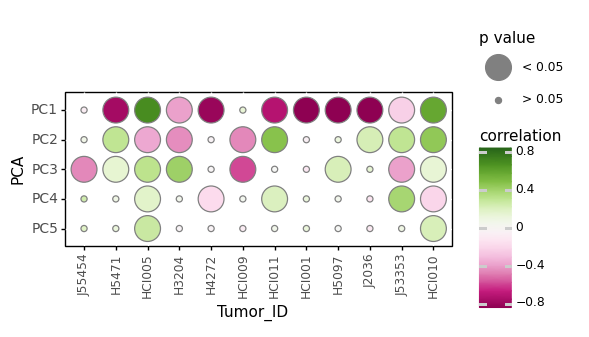

<ggplot: (8793850222641)>

In [16]:
receptor_plot_ref

In [17]:
save_as_pdf_pages([receptor_plot_ref],'SS2_PCA_EMP_score_correlation_ref.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_PCA_EMP_score_correlation_ref.pdf


In [18]:
cat_order = ['J55454', 'H5471', 'HCI005', 'H3204', 'H4272', 'HCI009',
    'HCI011', 'HCI001', 'H5097', 'J2036', 'J53353', 'HCI010']
final_df_filtered['Tumor_ID'] = pd.Categorical(final_df_filtered['Tumor_ID'], categories=cat_order, ordered=True)

receptor_plot = (ggplot(final_df_filtered,aes(y='PCA', x='Tumor_ID',size='significant', fill='correlation')) 
                 + geom_point(alpha=1) 
                 + guides(fill = None,color=None,size=None) 
                 + scale_size(name="p value", range = [2,10], trans='reverse', breaks=[0,1], labels=['< 0.05','> 0.05']) 
                 + scale_fill_cmap(('PiYG'),limits=(-0.8,0.8)) 
                 + theme(axis_text_x=element_blank(),
                         axis_text_y=element_blank(),
                         axis_title_x=element_blank(),
                         axis_title_y=element_blank(),
                         strip_background=element_blank(), 
                         strip_text_x=element_blank(),
                         plot_background=element_rect(fill='white', alpha=.3),
                         panel_background=element_rect(fill='white', alpha=.2),
                         figure_size=(5, 2),
                         panel_border = element_rect(colour = "black", fill=None, size=1),
                         axis_ticks = element_blank())
                )

<ipython-input-18-2a584719c5e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


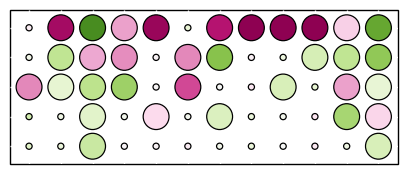

<ggplot: (8793849691311)>

In [19]:
receptor_plot

In [20]:
save_as_pdf_pages([receptor_plot],'SS2_PCA_EMP_score_correlation.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_PCA_EMP_score_correlation.pdf


In [21]:
final_df_filtered = final_df[final_df['method'] == 'MULTI']

cat_order = ['HCI002', 'J55454', 'HCI005', 'H4272', 'HCI011', 'HCI001',
              'H5097', 'J2036', 'J53353', 'HCI010']
final_df_filtered['Tumor_ID'] = pd.Categorical(final_df_filtered['Tumor_ID'], categories=cat_order, ordered=True)

pca_order = ['PC5', 'PC4', 'PC3', 'PC2', 'PC1']
final_df_filtered['PCA'] = pd.Categorical(final_df_filtered['PCA'], categories= pca_order, ordered=True)

receptor_plot_ref = (ggplot(final_df_filtered,aes(y='PCA', x='Tumor_ID',size='significant', fill='correlation')) 
                     + geom_point(alpha=1, color='gray') 
                     + scale_size(name="p value", range = [2,10], trans='reverse', breaks=[0,1], labels=['< 0.05','> 0.05'])
                     + scale_fill_cmap(('PiYG'),limits=(-0.8,0.8)) 
                     + theme(axis_text_x=element_text(rotation=90),
                             axis_text_y=element_text(size=10, hjust=1),
                             plot_background=element_rect(fill='white', alpha=.3),
                             panel_background=element_rect(fill='white', alpha=.2),
                             figure_size=(5, 2),
                             panel_border = element_rect(colour = "black", fill=None, size=1),
                             legend_key = element_blank())
                    )

<ipython-input-21-597e394206b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-597e394206b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


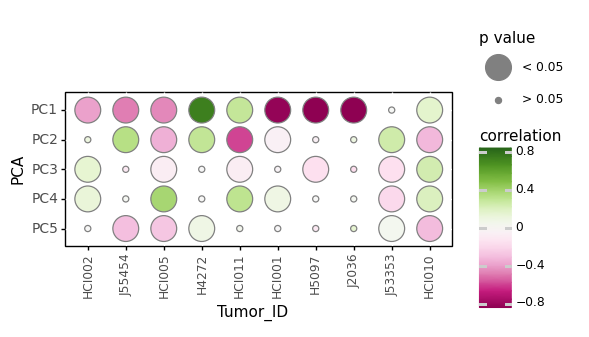

<ggplot: (8793849895674)>

In [22]:
receptor_plot_ref

In [23]:
save_as_pdf_pages([receptor_plot_ref],'MULTI_PCA_EMP_score_correlation_ref.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: MULTI_PCA_EMP_score_correlation_ref.pdf


In [24]:
receptor_plot = (ggplot(final_df_filtered,aes(y='PCA', x='Tumor_ID',size='significant', fill='correlation')) 
                 + geom_point(alpha=1) 
                 + guides(fill = None,color=None,size=None) 
                 + scale_size(name="p value",range = [2,10],trans='reverse',breaks=[0,1],labels=['< 0.05','> 0.05']) 
                 + scale_fill_cmap(('PiYG'),limits=(-0.8,0.8)) 
                 + theme(axis_text_x=element_blank(),
                         axis_text_y=element_blank(),
                         axis_title_x=element_blank(),
                         axis_title_y=element_blank(),
                         strip_background=element_blank(), 
                         strip_text_x=element_blank(),
                         plot_background=element_rect(fill='white', alpha=.3),
                         panel_background=element_rect(fill='white', alpha=.2),
                         figure_size=(5, 2),
                         panel_border = element_rect(colour = "black", fill=None, size=1),
                         axis_ticks = element_blank())
                )

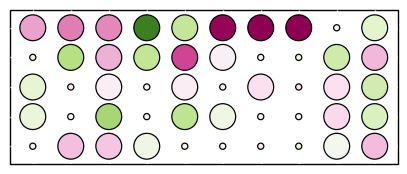

<ggplot: (8793850022078)>

In [25]:
receptor_plot

In [26]:
save_as_pdf_pages([receptor_plot],'MULTI_PCA_EMP_score_correlation.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: MULTI_PCA_EMP_score_correlation.pdf
